In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('diabetes.csv', names=cols)

In [4]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
len(df.columns.values)

9

In [6]:
df.shape

(768, 9)

###

Q 3 : 20 points
On choisit la stratégie de transformation suivante pour les valeurs aberrantes :
• Généralement, si trois valeurs (dans 3 series) dans un enregistrement sont 0, on
supprime l’enregistrement correspondant.
• On choisit le mode ou la valeur la plus fréquente si la valeur outlier est dans une
serie qui identifie une caractéristique importante
• On supprime la serie si celle-ci contient plus de 85% de valeurs outliers
Sur la base de cette stratégie, procéder au nettoyage et transformation de ce dataset


###

In [7]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

###
---------------------------

Un peu de recherche m'a amené ici: https://asecuritysite.com/bigdata/pandas_di
On y trouve ces informations:

Details:

preg. Number of times pregnant

plas. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres. Diastolic blood pressure (mm Hg)

skin. Triceps skin fold thickness (mm)

test. 2-Hour serum insulin (mu U/ml)

mass. Body mass index (weight in kg/(height in m)^2)

pedi. Diabetes pedigree function

age. Age (years)

class. Class variable (0 or 1)


---------------------------
###

In [8]:
### à quoi se rassemble notre dataset?

df.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


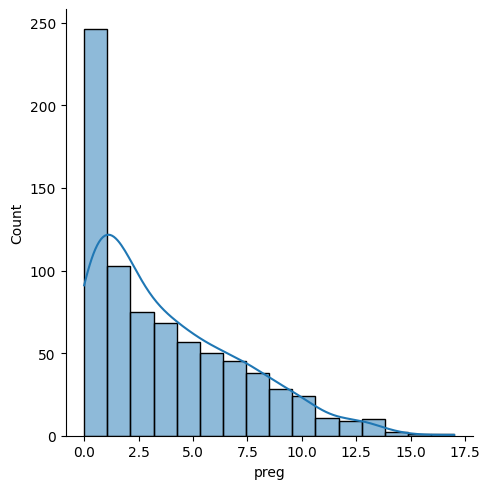

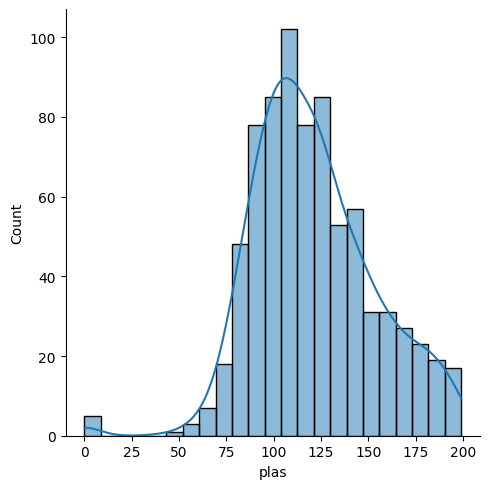

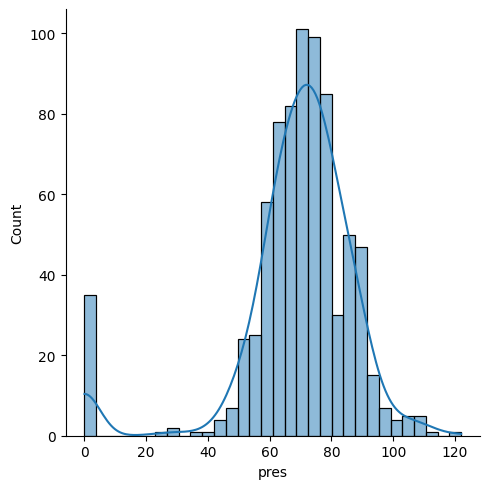

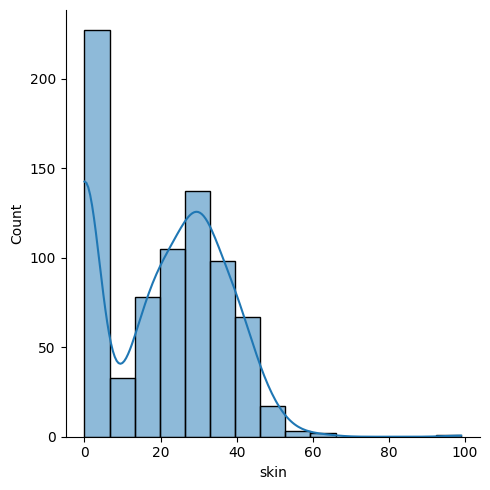

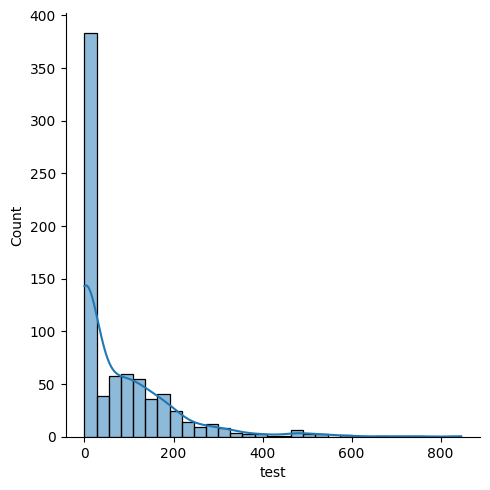

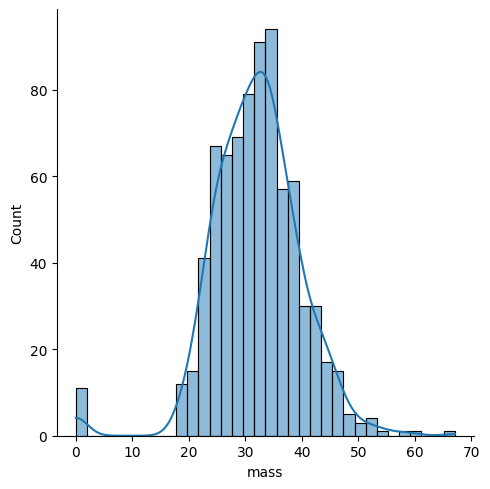

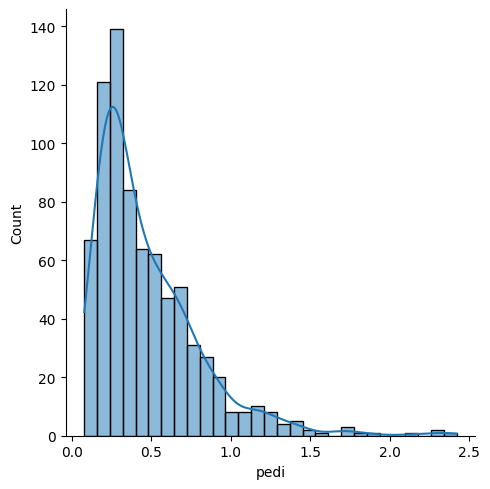

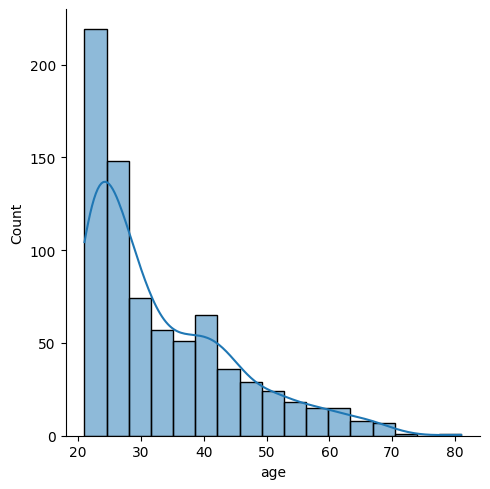

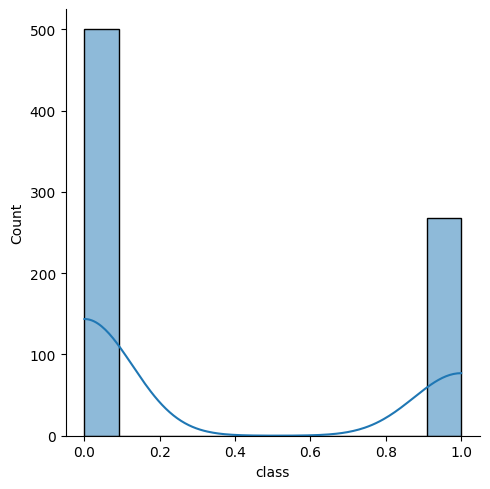

In [9]:
### Partie 2, Q2 ---> Pour chaque série, vérifier s'il y a des valuers aberrantes.

for c in df.columns:
    #print ("col: ", c)
    sns.displot(df[c], kde='False')

In [10]:
### class = variable à prédire
df['class'].unique()

array([1, 0])

/

------------------------
Déjà avec le résultat ci-haut on a quelques éléments de réponse pour les questions 1 et 2

Q1) Identifier les colonnes ou serie pouvant faire l’objet de normalisation/mise à l’échelle
(Scaling).
Pour chacune des séries, indiquer le type de scaling à utiliser (Standard, MinMax, Robut) 

----> Réponse: Les réponse se trouvent en bas avec les réponse de Q2.Vu que dans la présence d'outliers le RobustScaler semble être la meilleur option, les colonnes ayant d'outliers j'ajoute la mention de RobustScaler.
'
If some outliers are present in the set, robust scalers or transformers are more appropriate.
'
https://scikit-learn.org/stable/modules/preprocessing.html


Dans les cas où les colonnes ne contiennent pas de valeurs aberrantes (ou que je ne sais pas si les valeur sont aberrantes ou legitimes), j'ai recommendé le StandardScaler, vu que ça semble être une pratique commune: 
'
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.
'
https://scikit-learn.org/stable/modules/preprocessing.html

Le code pour l'application des scalers se trouve dans une cellule plus bas ('Q1 - application de scalers').


---------------------


Q2) Pour chaque serie, indiquer s’il y’a des valeurs aberrantes. Vous devriez motiver votre
choix. Dans notre cas, il y’a des colonnes qui normalement ne devraient pas avoir des
valeurs proches ou égales à 0 par exemple

----> Réponse:

- preg:      Oui, il y a des valeur aberrantes (par exemple, 12, 15, 17 enfants). Utiliser RobustScaler
- plas:      Je n'ai pas de connaissance sur le niveau de plasma glucose pour dire s'il y a des valeur aberrantes ou non. Utiliser StandardScaler 
- pres:      Oui, il y a des outliers. La pression = 0, même sans être médecin, me semble comme une valeur manquante où on imputé 0. Utiliser RobustScaler.
- skin:     Oui, il y a des valeur aberrantes. Les valeurs 0 et 99 sont aberrantes. J'ose à dire que les deux valeur ont été utilisées pour l'imputation de données manquantes. Utiliser RobustScaler. 
- test:     Oui, il y a des valeur aberrantes.  Je ne sais pas dire si 0 est une valeur legitime ou le résultat d'une imputation. Pourtant, la valeur max (846), je dirais qu'il s'agit d'une valeur aberrante. Utiliser RobustScaler
- mass:     Oui, il y a des valeur aberrantes. Une masse = 0 correspond à quelque chose que n'existe pas physiquement. Utiliser RobustScaler
- pedi:     'pedi. Diabetes pedigree function'. Je ne connais rien de fonction de pedigree de diabètes. 
- age:      Non, il n'y a pas de valeur aberrantes. Utiliser RobustScaler
- class    Non, il n'y a pas de valuers aberrantes. Les valeur sont binaires, aucune stanrdisation à appliquer.

--------------------------
/

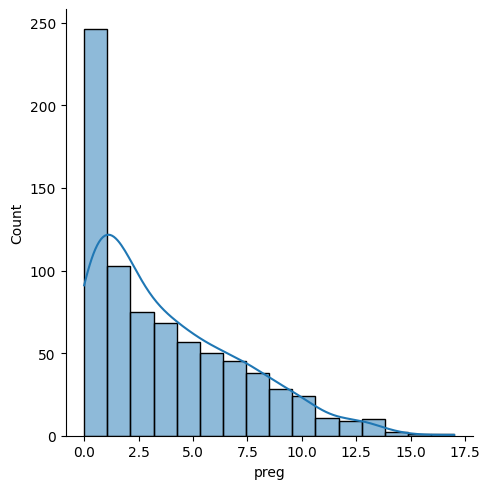

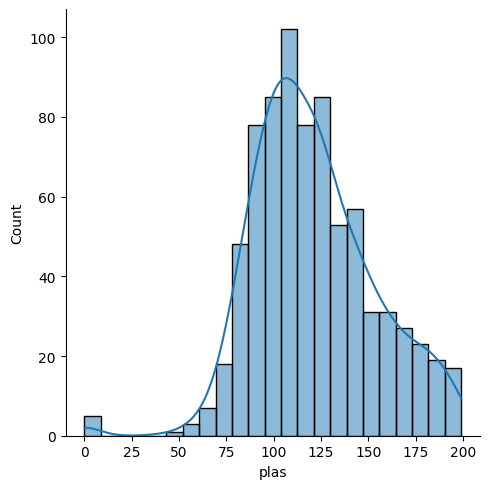

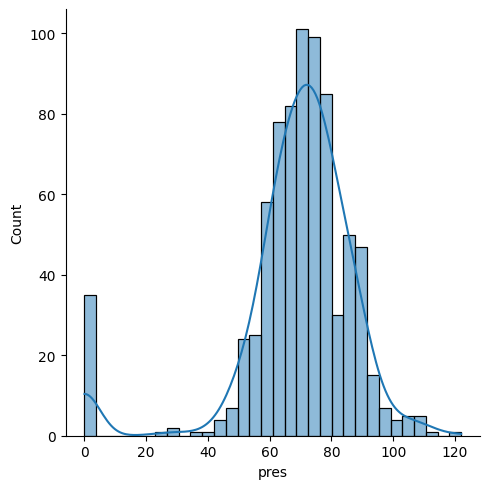

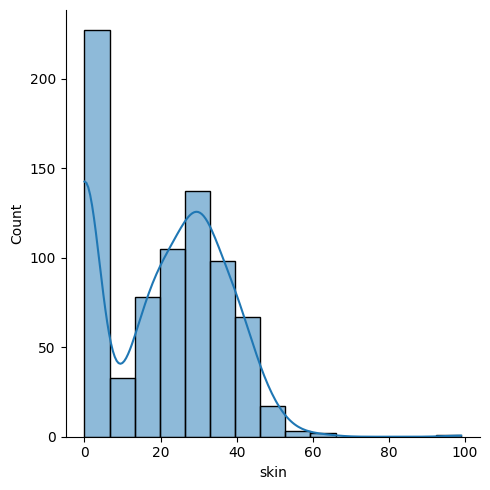

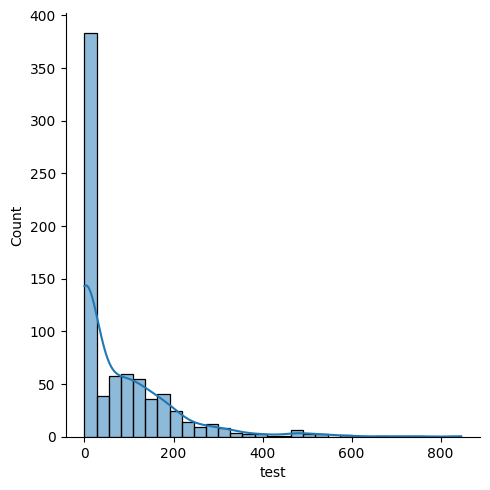

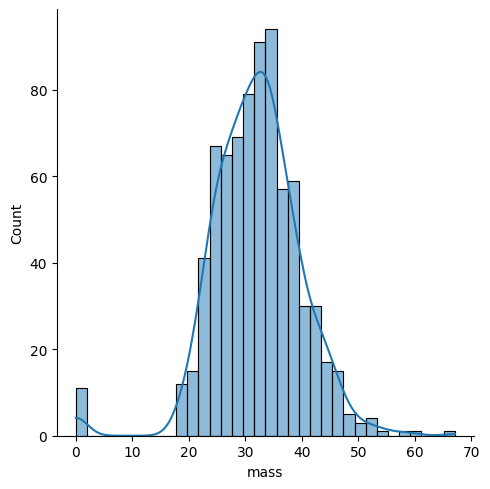

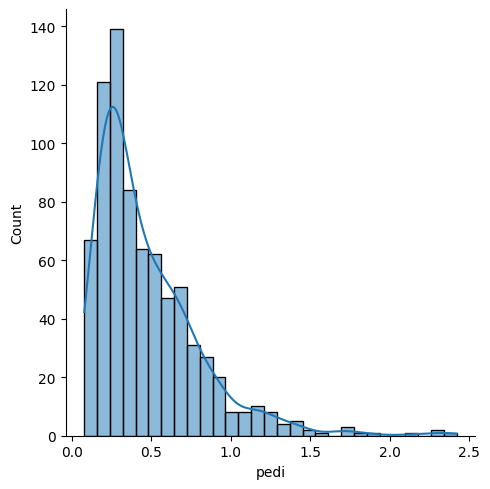

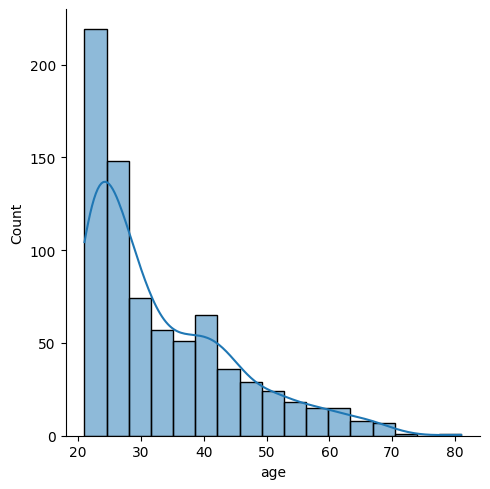

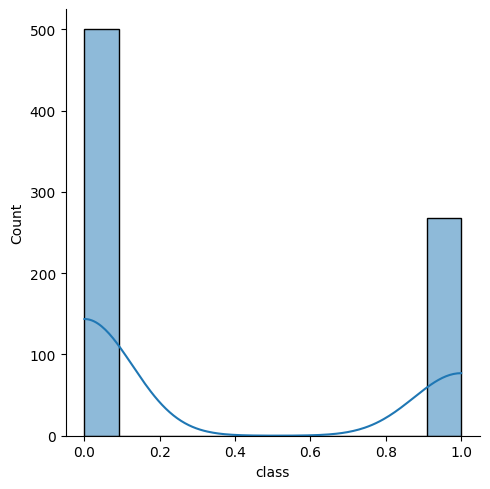

In [11]:
### Partie 2, Q2 ---> Pour chaque série, vérifier s'il y a des valuers aberrantes.

for c in df.columns:
    #print ("col: ", c)
    sns.displot(df[c], kde='False')

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [44]:
#### Q1 - application de scalers

#- preg:      Oui, il y a des valeur aberrantes (par exemple, 12, 15, 17 enfants). Utiliser RobustScaler
#- plas:      Je n'ai pas de connaissance sur le niveau de plasma glucose pour dire s'il y a des valeur aberrantes ou non. Utiliser StandardScaler 
#- pres:      Oui, il y a des outliers. La pression = 0, même sans être médecin, me semble comme une valeur manquante où on imputé 0. Utiliser RobustScaler.
#- skin:     Oui, il y a des valeur aberrantes. Les valeurs 0 et 99 sont aberrantes. J'ose à dire que les deux valeur ont été utilisées pour l'imputation de données manquantes. Utiliser RobustScaler. 
#- test:     Oui, il y a des valeur aberrantes.  Je ne sais pas dire si 0 est une valeur legitime ou le résultat d'une imputation. Pourtant, la valeur max (846), je dirais qu'il s'agit d'une valeur aberrante. Utiliser RobustScaler
#- mass:     Oui, il y a des valeur aberrantes. Une masse = 0 correspond à quelque chose que n'existe pas physiquement. Utiliser RobustScaler
#- pedi:     'pedi. Diabetes pedigree function'. Je ne connais rien de fonction de pedigree de diabètes. 
#- age:      Non, il n'y a pas de valeur aberrantes. Utiliser RobustScaler
#- class    Non, il n'y a pas de valuers aberrantes. Utiliser RobustScaler

def getScaledDf(pDf = df):

    #création d'un dictionnaire avec le scaler à appliquer
    dictColScaler = {}
    dictColScaler.update({'preg': 'RobustScaler'})
    dictColScaler.update({'plas': 'StandardScaler'})
    dictColScaler.update({'pres': 'RobustScaler'})
    dictColScaler.update({'skin': 'RobustScaler'})
    dictColScaler.update({'test': 'RobustScaler'})
    dictColScaler.update({'mass': 'RobustScaler'})
    dictColScaler.update({'pedi': 'StandardScaler'})
    dictColScaler.update({'age': 'StandardScaler'})

    ## nouveau dataframe avec les colonnes mises à l'échelle
    newDf = pd.DataFrame()
    
    ### Application du scaler
    for key in dictColScaler.keys():
        #print("key: ", key)
        #print("value: ", dictColScaler[key])
        newCol = pd.DataFrame(pDf[key], columns = [key])
        scaler = globals()[dictColScaler[key]]()
        scaledCol = pd.DataFrame( scaler.fit_transform(newCol, pDf['class']), columns=[key])
        #print(type(scaledCol))
        #print(scaledCol.head())
        newDf[key] = scaledCol
    
    return newDf

In [45]:
newDf = getScaledDf()

In [49]:
newDf.describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02
mean,0.169010,-9.251859e-18,-0.160807,-0.076986,0.387422,-0.000798,2.451743e-16,1.931325e-16
std,0.673916,1.000652e+00,1.075323,0.498507,0.905650,0.847759,1.000652e+00,1.000652e+00
min,-0.600000,-3.783654e+00,-4.000000,-0.718750,-0.239686,-3.440860,-1.189553e+00,-1.041549e+00
25%,-0.400000,-6.852363e-01,-0.555556,-0.718750,-0.239686,-0.505376,-6.889685e-01,-7.862862e-01
50%,0.000000,-1.218877e-01,0.000000,0.000000,0.000000,0.000000,-3.001282e-01,-3.608474e-01
75%,0.600000,6.057709e-01,0.444444,0.281250,0.760314,0.494624,4.662269e-01,6.602056e-01
max,2.800000,2.444478e+00,2.777778,2.375000,6.408644,3.774194,5.883565e+00,4.063716e+00


### NOTE

Avec le résultat ci-haut, je me rends compte qu'il y a des valeurs négatives.

Peut-être le MinMaxScaler aurait été un meilleur choix. Ça suffirait de changer le dictionnaire de la fonction getScaledDf avec le MinMaxSclaer

In [34]:
df_mod = df.copy()

In [50]:
df_mod.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [51]:
df_mod.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:

lstCols = ['pres', 'skin', 'mass']
for c in lstCols:
    newCol = pd.DataFrame(df[c], columns =[c]) 
    newCol.replace(to_replace=0, value=np.nan, inplace=True)
    #print(newCol)
    df_mod[c] = newCol

In [65]:
df_mod.isnull().sum()

preg       0
plas       0
pres      35
skin     227
test       0
mass      11
pedi       0
age        0
class      0
dtype: int64

In [77]:
## on applique la règle de 3 nulls dans la même ligne

dfInvalidRows = pd.DataFrame(df_mod.isnull().sum(axis=1), columns=['countNulls'])

In [78]:
## Les enregistrements que l'on peut supprimmer
dfInvalidRows[dfInvalidRows['countNulls']>=3]

,countNulls
49,3
60,3
81,3
426,3
494,3
522,3
706,3


In [79]:
df_mod['cntNulls'] = dfInvalidRows

In [83]:
#data = data.loc[data["cases"] != 0]
df_mod2 = df_mod.loc[df_mod['cntNulls']<3]


In [84]:
df_mod2.shape

(761, 10)

In [95]:
### imputation valeur plus fŕquente
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
df_mod3=pd.DataFrame( imp_mean.fit_transform(df_mod2), columns = df_mod2.columns)

#df_mod2.fillna()

In [96]:
df_mod3

,preg,plas,pres,skin,test,mass,pedi,age,class,cntNulls
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,0.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,0.0
2,8.0,183.0,64.0,29.0,0.0,23.3,0.672,32.0,1.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
756,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,0.0
757,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0,0.0
758,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.0
759,1.0,126.0,60.0,29.0,0.0,30.1,0.349,47.0,1.0,1.0


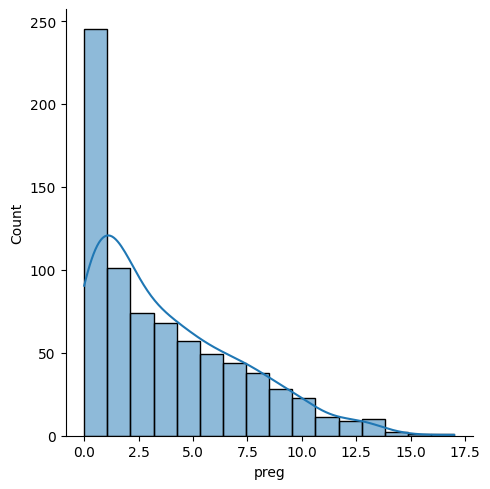

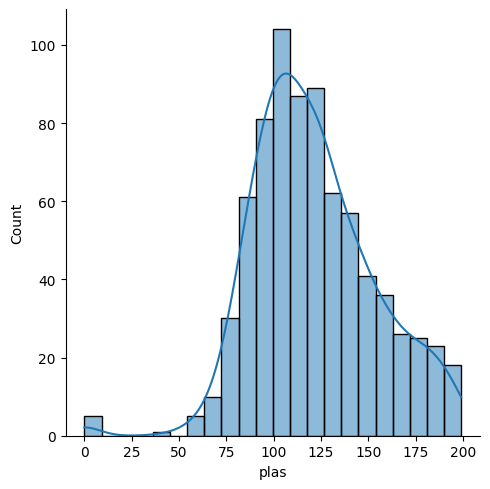

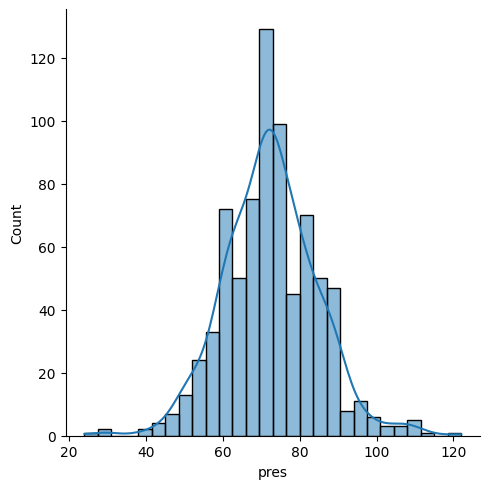

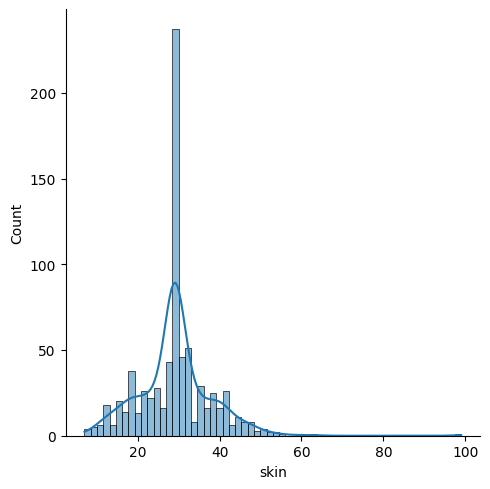

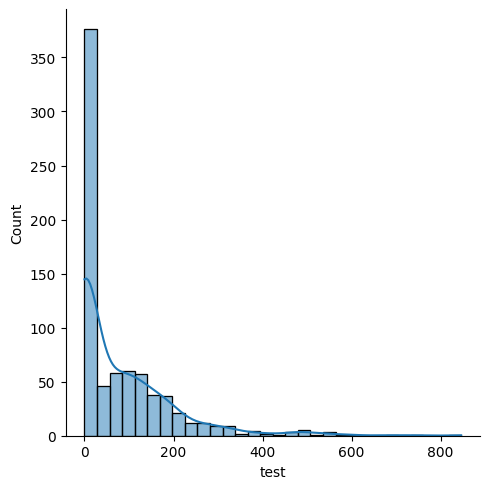

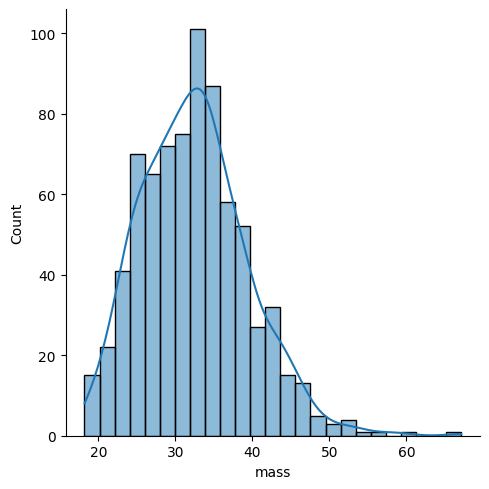

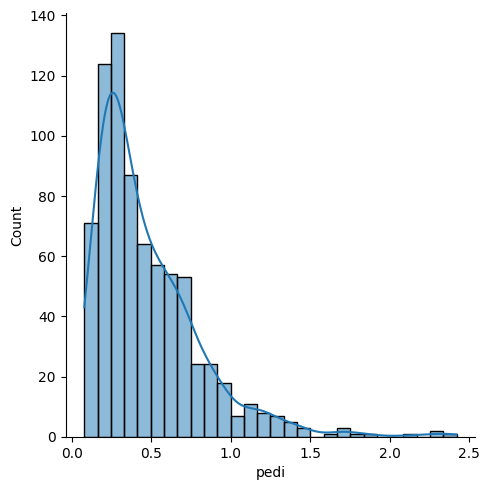

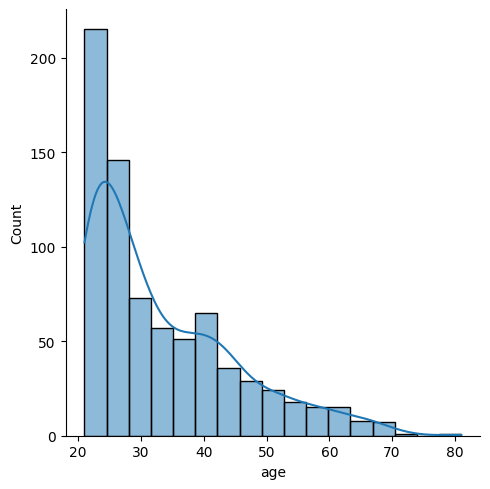

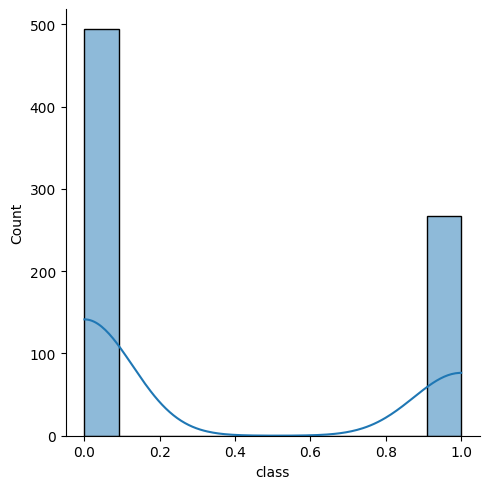

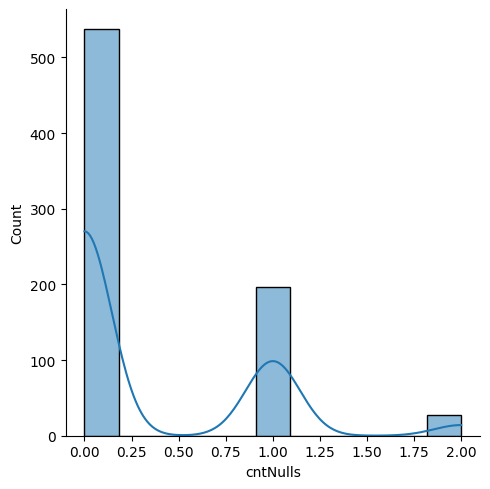

In [98]:
for c in df_mod2.columns:
    #print ("col: ", c)
    sns.displot(df_mod3[c], kde='False')